In [174]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage as ski
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import numpy as np

In [55]:
img = cv.imread(r"C:\Users\muham\Downloads\ATTA_GNS_centrif_01 1458 Camera Ceta 120 kx Ceta.tif")
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [ ]:
resized = cv.resize(img, (1024,1024), interpolation = cv.INTER_AREA)
gray = ski.util.invert(cv.cvtColor(resized, cv.COLOR_BGR2GRAY))

In [9]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [14]:
sam_checkpoint = r"C:\Users\muham\Downloads\sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

mask_generator_2 = SamAutomaticMaskGenerator(
    model = sam,
    points_per_side = 12,
    points_per_batch = 64,
    pred_iou_thresh = 0.36,
    stability_score_thresh = 0.95,
    stability_score_offset = 1,
    box_nms_thresh = 0.7,
    crop_n_layers = 0,
    crop_nms_thresh = 0.7,
    crop_overlap_ratio = 512 / 1500,
    crop_n_points_downscale_factor = 1,
    point_grids = None,
    min_mask_region_area = 0,
    output_mode = "binary_mask"
)

In [15]:
masks = mask_generator_2.generate(resized)

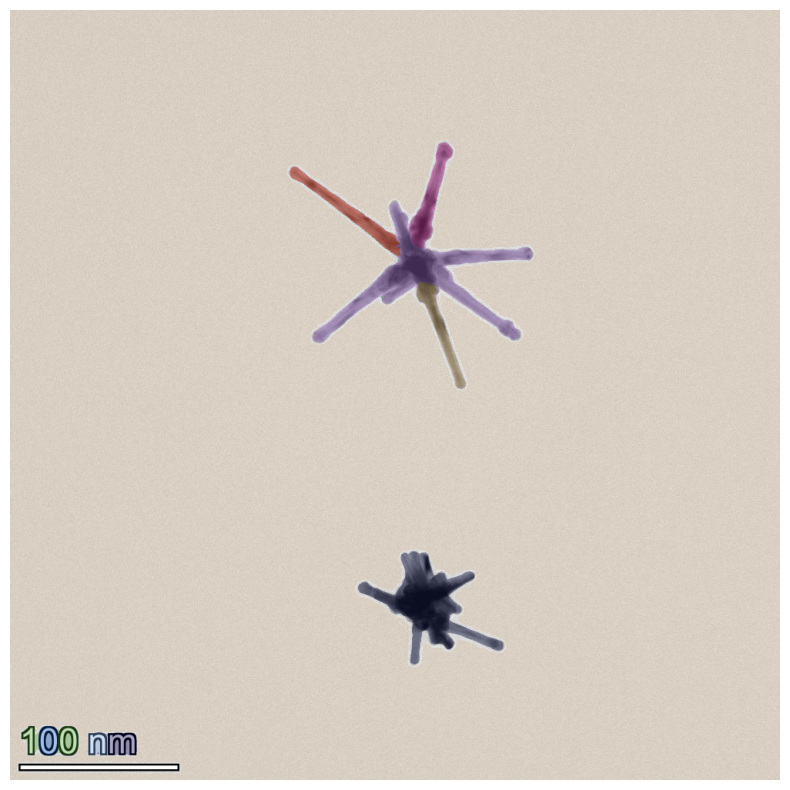

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(resized)
show_anns(masks)
plt.axis('off')
plt.show() 